In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/shijianzhong/anaconda/envs/py36/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('train.csv')
df.head()


,1,2,3,4,5,6,7,8,9,10,...,547,548,549,550,551,552,553,554,bag_num,label
0,4.267247,-0.546598,-2.506080,-2.268732,-1.965279,-2.263128,-2.407531,-2.030531,-2.314407,-1.735125,...,-3.707105,-7.794694,-3.557639,-1.395715,-7.158656,-0.302812,-0.932784,-2.300241,1.0,5.0
1,4.116929,-0.441998,-2.329116,-2.275494,-1.949666,-2.379057,-2.416471,-2.013451,-2.400011,-1.750614,...,-3.721543,-7.795036,-3.572315,-1.601865,-7.158656,0.644038,-1.858380,-2.789870,1.0,5.0
2,4.135179,-0.524323,-2.139451,-2.268962,-1.933447,-2.425190,-2.410937,-1.990225,-2.449587,-1.742491,...,-3.718466,-7.794977,-3.569483,-1.601865,-3.977031,1.688794,-1.220330,-2.461512,1.0,5.0
3,4.128095,-0.705681,-2.324635,-2.270585,-1.965863,-2.454252,-2.412339,-2.029633,-2.479243,-1.742491,...,-3.719177,-7.794987,-3.574765,-1.530896,-6.704138,1.648336,-0.366304,-1.563638,1.0,5.0
4,4.090460,-0.446283,-2.175281,-2.275251,-1.960694,-2.453773,-2.415295,-2.023277,-2.482097,-1.749503,...,-3.718699,-7.794988,-3.575702,-1.601865,-6.704138,0.357529,-1.097665,-2.264298,1.0,5.0


In [7]:
test_df = pd.read_csv('test.csv')
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,545,546,547,548,549,550,551,552,553,554
0,4.190615,-0.334002,-1.566038,-2.249860,-1.895723,-2.351584,-2.394901,-1.962179,-2.362360,-1.703653,...,-4.027569,-5.224459,-3.641850,-7.792128,-3.500826,-0.964631,-6.476879,0.151521,-0.773041,-1.854825
1,4.182251,-0.304212,-2.346520,-2.254565,-1.940968,-2.393738,-2.398867,-2.005524,-2.416319,-1.722160,...,-4.043123,-5.169643,-3.660637,-7.792960,-3.527836,-1.150763,-7.158656,-0.064403,-0.326228,-1.754202
2,4.884058,0.142949,-0.968704,-0.496546,-0.237465,-0.651201,-0.526435,-0.303020,-0.602412,-0.163223,...,-2.912192,-3.656741,-2.338574,-7.266058,-2.240987,0.411616,-5.340585,0.847915,-0.522249,-1.924811
3,3.692136,-0.257338,-2.022309,-2.145843,-1.852379,-2.365756,-2.278687,-1.919724,-2.391045,-1.648959,...,-3.955365,-5.248963,-3.618839,-7.789293,-3.477197,-0.859243,-7.158656,-0.309448,0.429705,-0.818019
4,4.115187,-0.351935,-1.935575,-2.275640,-1.970764,-2.439753,-2.415642,-2.035021,-2.466583,-1.750236,...,-4.114053,-5.236435,-3.726561,-7.795106,-3.582252,-1.601865,-6.931397,1.867965,-2.337221,-2.995538


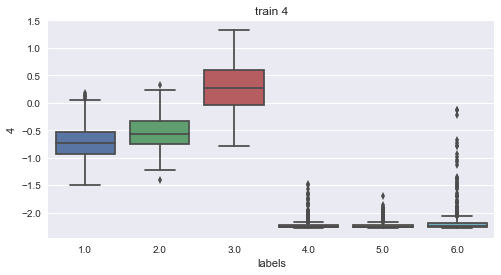

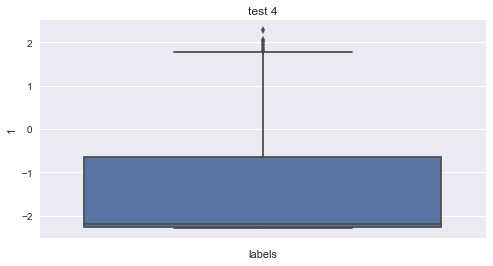

In [16]:
lab = '4'
plt.figure(figsize=(8,4))
g = sns.boxplot(x='label', y=lab, data=df)
#g.figure.get_axes()[0].set_yscale('log')
plt.xlabel('labels')
plt.ylabel(lab)
plt.title('train ' + lab)
plt.show()

plt.figure(figsize=(8,4))
g = sns.boxplot(y=lab, data=test_df)
#g.figure.get_axes()[0].set_yscale('log')
plt.xlabel('labels')
plt.ylabel('1')
plt.title('test ' + lab)
plt.show()

In [21]:
# check for covariate shift
column_list = list(test_df)
for column in column_list:
    train_mean = np.mean(df[column].values)
    test_mean = np.mean(test_df[column].values)
    diff = train_mean - test_mean
    if abs(diff) > 0.2:
        print(column, 'train: ', train_mean, 'test: ', test_mean, 'diff: ', diff)
    

5 train:  -0.910857168725 test:  -1.1121057468 diff:  0.201248578077
14 train:  1.040586675 test:  1.24180031908 diff:  -0.201213644079
24 train:  -0.181363914733 test:  -0.394623111987 diff:  0.213259197254
56 train:  -0.391999759418 test:  -0.132740820929 diff:  -0.259258938489
59 train:  -1.92670843357 test:  -1.69398387917 diff:  -0.232724554402
84 train:  -1.45349271372 test:  -1.65996555483 diff:  0.206472841109
85 train:  -1.27699107473 test:  -1.51227179855 diff:  0.235280723818
87 train:  -1.4287987857 test:  -1.63360465108 diff:  0.204805865379
88 train:  -1.20555776108 test:  -1.43808381028 diff:  0.232526049204
91 train:  -2.41640953372 test:  -2.65654633273 diff:  0.240136799008
93 train:  1.29562802144 test:  1.51498989478 diff:  -0.219361873335
94 train:  1.78570522842 test:  2.01052017931 diff:  -0.224814950887
98 train:  -3.2684473811 test:  -3.51819899674 diff:  0.249751615633
100 train:  -1.35143741398 test:  -1.55281971685 diff:  0.201382302869
101 train:  -1.639715